In [9]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn.utils import shuffle

import cv2


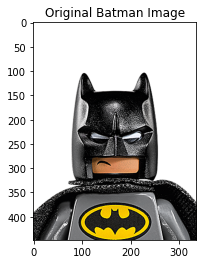

In [10]:
# read batman image
batman_original = cv2.cvtColor(plt.imread('batman.png'), cv2.COLOR_BGRA2BGR) # Converting from RGB to 
plt.imshow(batman_original)
plt.title('Original Batman Image')
plt.show()

In [11]:
# Check and flatten image
w,h,d = np.shape(batman_original)
assert d == 3
flatten_2d_batman = np.reshape(batman_original,(w*h,d))

In [74]:
# Choosing number of colors
c_num = 9
# picking random small sample from the image to train K_Means
sample_flatten_2d_batman = shuffle(flatten_2d_batman)[:1000]

In [75]:
# Kmeans set up and training over a minibatch
cls = GMM(n_components=c_num)
cls.fit(sample_flatten_2d_batman)


GaussianMixture(n_components=9)

In [76]:
# Predicting the color for whole of the image
constructed_flatten_batman = cls.predict(flatten_2d_batman)

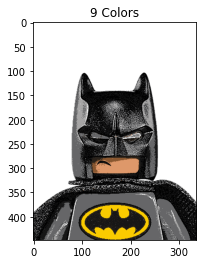

In [77]:
# Reshape and Visualize image
constructed_batman = []
for i in range(len(constructed_flatten_batman)):
    constructed_batman.append(cls.means_[constructed_flatten_batman[i]])
constructed_batman = np.reshape(constructed_batman,(w,h,3))/np.max(constructed_batman)
plt.imshow(constructed_batman)
plt.title(str(c_num)+' Colors')
plt.show()

In [78]:
plt.imsave(str(c_num)+'_Colors_batman.png',constructed_batman)